In [ ]:
import pandas as pd

movies_df = pd.read_csv('./movie-lens-1m/movies.dat', delimiter='::', engine='python', header=None, names=['MovieId', 'Title', 'Genres'], encoding='latin1')
ratings_df = pd.read_csv('./movie-lens-1m/ratings.dat', delimiter='::', engine='python', header=None, names=['UserId', 'MovieId', 'Rating', 'Timestamp'], encoding='latin1')
users_df = pd.read_csv('./movie-lens-1m/users.dat', delimiter='::', engine='python', header=None, names=['UserId', 'Gender','AgeRange', 'Occupation', 'Zip'], encoding='latin1')
def extract_year(title_with_year):
    return int(title_with_year[-5:-1])
movies_df['ReleasedYear'] = movies_df['Title'].apply(extract_year)
new_df = pd.merge(ratings_df, movies_df, on = 'MovieId')
full_df = pd.merge(new_df, users_df, on = 'UserId')

: 

In [43]:
full_df.count()

UserId          1000209
MovieId         1000209
Rating          1000209
Timestamp       1000209
Title           1000209
Genres          1000209
ReleasedYear    1000209
Gender          1000209
AgeRange        1000209
Occupation      1000209
Zip             1000209
dtype: int64

In [44]:
full_df_sorted = full_df.sort_values(by='ReleasedYear')

first_movie = full_df_sorted.iloc[0]
last_movie = full_df_sorted.iloc[-1]

In [47]:
full_df.head()
print(full_df.dtypes)

UserId           int64
MovieId          int64
Rating           int64
Timestamp        int64
Title           object
Genres          object
ReleasedYear     int64
Gender          object
AgeRange         int64
Occupation       int64
Zip             object
dtype: object


In [48]:
numeric_df = full_df.select_dtypes(include=['number'])
group_by_mean = numeric_df.groupby("MovieId").mean()
group_by_mean

,UserId,Rating,Timestamp,ReleasedYear,AgeRange,Occupation
MovieId,,,,,,
1,3053.819933,4.146846,9.705586e+08,1995.0,27.700530,8.067886
2,3027.977175,3.201141,9.717322e+08,1995.0,27.800285,7.680456
3,2632.156904,3.016736,9.734544e+08,1995.0,29.276151,7.826360
4,3268.841176,2.729412,9.716206e+08,1995.0,27.788235,6.752941
5,3143.152027,3.006757,9.718301e+08,1995.0,27.425676,7.506757
...,...,...,...,...,...,...
3948,2063.107889,3.635731,9.822191e+08,2000.0,27.737819,8.305104
3949,2289.046053,4.115132,9.937587e+08,2000.0,26.203947,7.578947
3950,2123.370370,3.666667,9.970516e+08,2000.0,27.851852,7.407407


In [49]:
group_by_count = full_df.groupby("MovieId").count()
group_by_count


,UserId,Rating,Timestamp,Title,Genres,ReleasedYear,Gender,AgeRange,Occupation,Zip
MovieId,,,,,,,,,,
1,2077,2077,2077,2077,2077,2077,2077,2077,2077,2077
2,701,701,701,701,701,701,701,701,701,701
3,478,478,478,478,478,478,478,478,478,478
4,170,170,170,170,170,170,170,170,170,170
5,296,296,296,296,296,296,296,296,296,296
...,...,...,...,...,...,...,...,...,...,...
3948,862,862,862,862,862,862,862,862,862,862
3949,304,304,304,304,304,304,304,304,304,304
3950,54,54,54,54,54,54,54,54,54,54


Equação da Reta: 16.506140 + -0.006657x

Intervalo de Confiança (95% CI) para a inclinação: 0.001733
Intervalo de Confiança (95% CI) para o intercepto: 3.402837


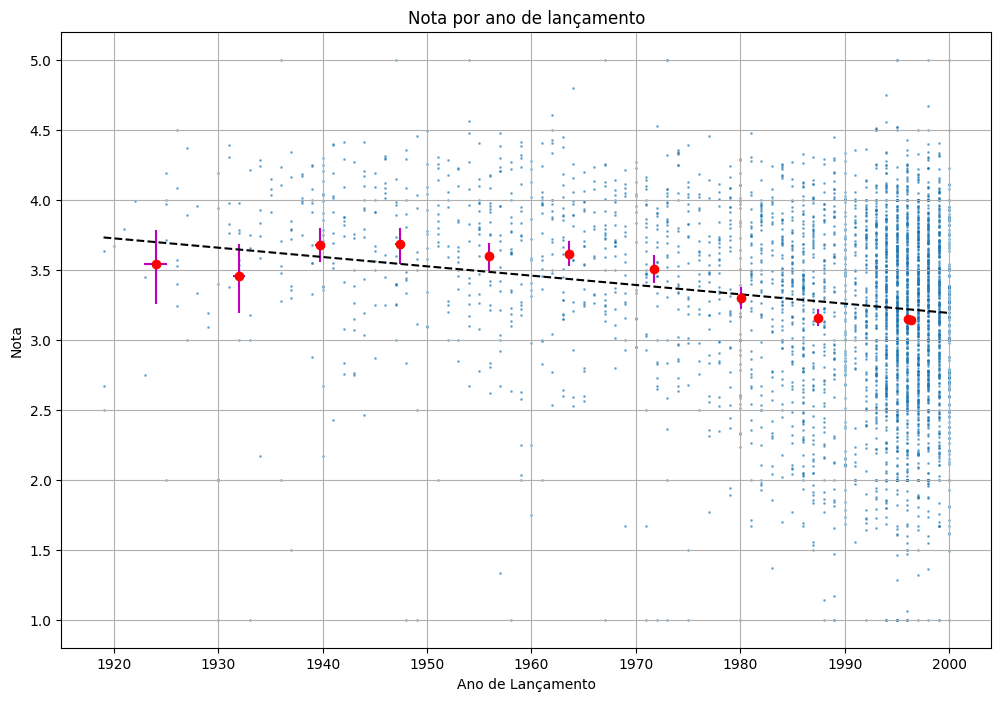

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import funcoes_pack as fun

def nota_ano(data):
    # Converter os dados para numpy arrays
    temp = data.to_numpy().T
    eixox = temp[0]
    eixoy = temp[1]

    # Número de pontos desejados
    num_of_points = 10

    # Chama a função winmeanerr da funcoes_pack para calcular médias e erros
    medias_x, medias_y, erros_x, erros_y = fun.winmeanerr(temp, num_of_points)

    # Ajustar o limite superior do intervalo de confiança para 95% do valor máximo das notas
    erros_y[1] = np.minimum(erros_y[1], 5)

    # Converter listas de erros em arrays numpy
    erros_x = np.array(erros_x).reshape(2, -1)
    erros_y = np.array(erros_y).reshape(2, -1)

    # Fazer a regressão ortogonal nos valores médios
    a, aintr = fun.olsregress(medias_x, medias_y)
    x_reg = np.linspace(eixox.min(), eixox.max(), num=2, endpoint=True)
    y_reg = a[1] + a[0] * x_reg

    # Criar figura e eixos
    plt.figure(figsize=(12, 8))

    # Gráfico de dispersão com pontos menores (s=1)
    plt.scatter(eixox, eixoy, alpha=0.5, s=1)

    # Configurar título e rótulos dos eixos
    plt.xlabel('Ano de Lançamento')
    plt.ylabel('Nota')
    plt.title('Nota por ano de lançamento')

    # Gráfico das médias com barras de erro
    plt.errorbar(medias_x, medias_y, xerr=erros_x, yerr=erros_y, fmt='ro', ecolor='m')

    # Plotar a reta da regressão ortogonal
    plt.plot(x_reg, y_reg, 'k--')

    # Exibir informações sobre a regressão
    print("Equação da Reta: %f + %fx" % (a[1], a[0]))
    print("\nIntervalo de Confiança (95%% CI) para a inclinação: %f" % (aintr[0]))
    print("Intervalo de Confiança (95%% CI) para o intercepto: %f" % (aintr[1]))

    # Exibir o gráfico
    plt.grid(True)
    plt.show()

# Exemplo de uso com os dados do dataframe group_by_mean
nota_ano(group_by_mean[['ReleasedYear', 'Rating']].dropna())


Equação da Reta: 28.117071 + -0.012519x

Intervalo de Confiança (95% CI) para a inclinação: 0.001068
Intervalo de Confiança (95% CI) para o intercepto: 2.108447


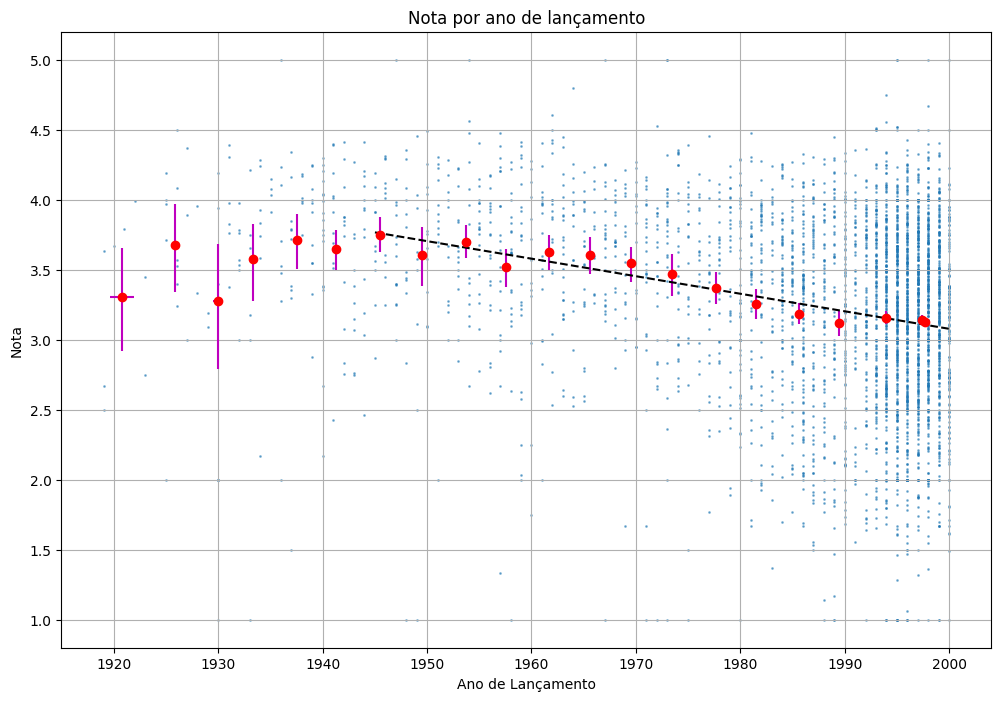

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import funcoes_pack as fun

def nota_ano(data):
    # Converter os dados para numpy arrays
    temp = data.to_numpy().T
    eixox = temp[0]
    eixoy = temp[1]

    # Número de pontos desejados
    num_of_points = 20

    # Chama a função winmeanerr da funcoes_pack para calcular médias e erros
    medias_x, medias_y, erros_x, erros_y = fun.winmeanerr(temp, num_of_points)

    # Ajustar o limite superior do intervalo de confiança para 95% do valor máximo das notas
    erros_y[1] = np.minimum(erros_y[1], 5)

    # Converter listas de erros em arrays numpy
    erros_x = np.array(erros_x).reshape(2, -1)
    erros_y = np.array(erros_y).reshape(2, -1)

    # Filtrar dados a partir de 1945
    mask_1945 = medias_x >= 1945
    medias_x_1945 = medias_x[mask_1945]
    medias_y_1945 = medias_y[mask_1945]

    # Fazer a regressão ortogonal nos valores médios a partir de 1945
    a, aintr = fun.olsregress(medias_x_1945, medias_y_1945)
    x_reg = np.linspace(1945, eixox.max(), num=2, endpoint=True)
    y_reg = a[1] + a[0] * x_reg

    # Criar figura e eixos
    plt.figure(figsize=(12, 8))

    # Gráfico de dispersão com pontos menores (s=1)
    plt.scatter(eixox, eixoy, alpha=0.5, s=1)

    # Configurar título e rótulos dos eixos
    plt.xlabel('Ano de Lançamento')
    plt.ylabel('Nota')
    plt.title('Nota por ano de lançamento')

    # Gráfico das médias com barras de erro
    plt.errorbar(medias_x, medias_y, xerr=erros_x, yerr=erros_y, fmt='ro', ecolor='m')

    # Plotar a reta da regressão ortogonal a partir de 1945
    plt.plot(x_reg, y_reg, 'k--')

    # Exibir informações sobre a regressão
    print("Equação da Reta: %f + %fx" % (a[1], a[0]))
    print("\nIntervalo de Confiança (95%% CI) para a inclinação: %f" % (aintr[0]))
    print("Intervalo de Confiança (95%% CI) para o intercepto: %f" % (aintr[1]))

    # Exibir o gráfico
    plt.grid(True)
    plt.show()

# Exemplo de uso com os dados do dataframe group_by_mean
nota_ano(group_by_mean[['ReleasedYear', 'Rating']].dropna())


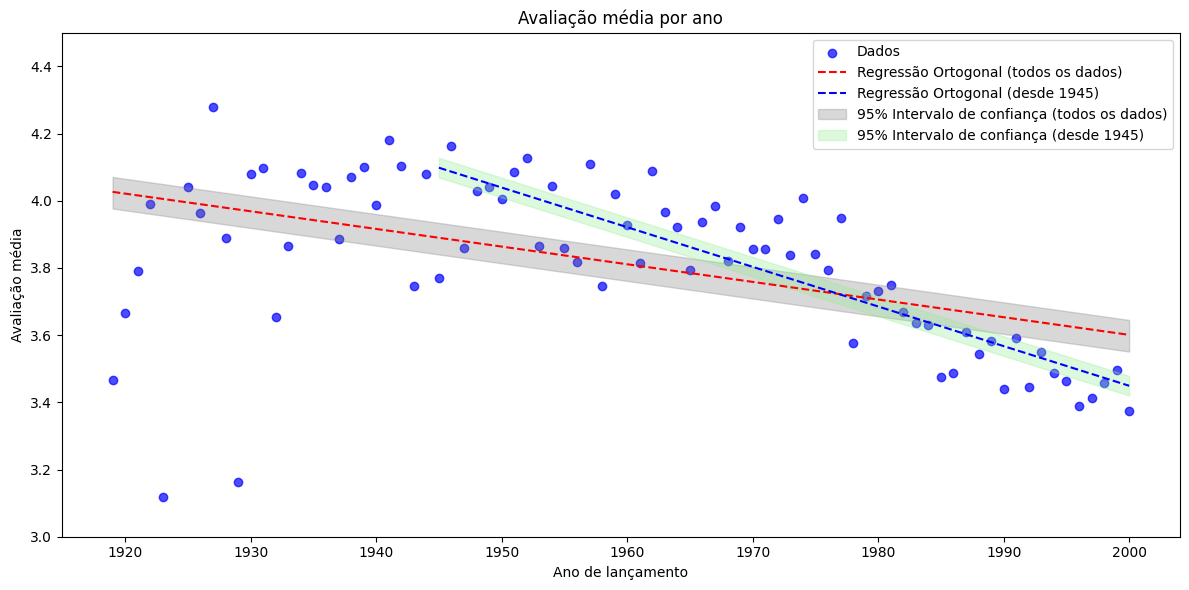

Coeficientes da Linha de Regressão Ortogonal (todos os dados):
Slope: -0.005254818417408982
Intercept: 14.11058642557661
Coeficientes da Linha de Regressão Ortogonal (desde 1945):
Slope: -0.011802019547849084
Intercept: 27.053385976711034


In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import funcoes_pack as fun


def avaliacao_ano(rating_by_year):
    x = np.array(sorted(rating_by_year.index))
    y = rating_by_year[x]

    # Modelo de regressão ortogonal para todos os dados
    a, aintr = fun.olsregress(x, y)
    y_pred = a[1] + a[0] * x
    confidence_interval = fun.bootstrap(y - y_pred, confidence=0.95, iterations=10000, sample_size=1.0)
    lower_bound, upper_bound = confidence_interval

    # Modelo de regressão ortogonal a partir de 1945
    x_1945 = np.array([year for year in x if year >= 1945])
    y_1945 = rating_by_year[x_1945]
    a_1945, aintr_1945 = fun.olsregress(x_1945, y_1945)
    y_pred_1945 = a_1945[1] + a_1945[0] * x_1945
    residuals_1945 = y_1945 - y_pred_1945
    confidence_interval_1945 = fun.bootstrap(residuals_1945, confidence=0.95, iterations=10000, sample_size=1.0)
    lower_bound_1945, upper_bound_1945 = confidence_interval_1945

    # Gráficos
    plt.figure(figsize=(12, 6))
    plt.scatter(x, y, color='blue', label='Dados', marker='o', alpha=0.7)
    plt.plot(x, y_pred, color='red', label='Regressão Ortogonal (todos os dados)', linestyle='--')
    plt.plot(x_1945, y_pred_1945, color='blue', label='Regressão Ortogonal (desde 1945)', linestyle='--')
    plt.fill_between(x, y_pred + lower_bound, y_pred + upper_bound, color='gray', alpha=0.3, label='95% Intervalo de confiança (todos os dados)')
    plt.fill_between(x_1945, y_pred_1945 + lower_bound_1945, y_pred_1945 + upper_bound_1945, color='lightgreen', alpha=0.3, label='95% Intervalo de confiança (desde 1945)')
    plt.xlabel('Ano de lançamento')
    plt.ylabel('Avaliação média')
    plt.title('Avaliação média por ano')
    plt.ylim(3, 4.5)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Coeficientes da linha de regressão ortogonal
    slope = a[0]
    intercept = a[1]
    print("Coeficientes da Linha de Regressão Ortogonal (todos os dados):")
    print(f"Slope: {slope}")
    print(f"Intercept: {intercept}")

    # Coeficientes da linha de regressão ortogonal desde 1945
    slope_1945 = a_1945[0]
    intercept_1945 = a_1945[1]
    print("Coeficientes da Linha de Regressão Ortogonal (desde 1945):")
    print(f"Slope: {slope_1945}")
    print(f"Intercept: {intercept_1945}")

avaliacao_ano(full_df.groupby('ReleasedYear')['Rating'].mean())

Comedy         356580
Drama          354529
Action         257457
Thriller       189680
Sci-Fi         157294
Romance        147523
Adventure      133953
Crime           79541
Horror          76386
Children's      72186
War             68527
Animation       43293
Musical         41533
Mystery         40178
Fantasy         36301
Western         20683
Film-Noir       18261
Documentary      7910
Name: count, dtype: int64


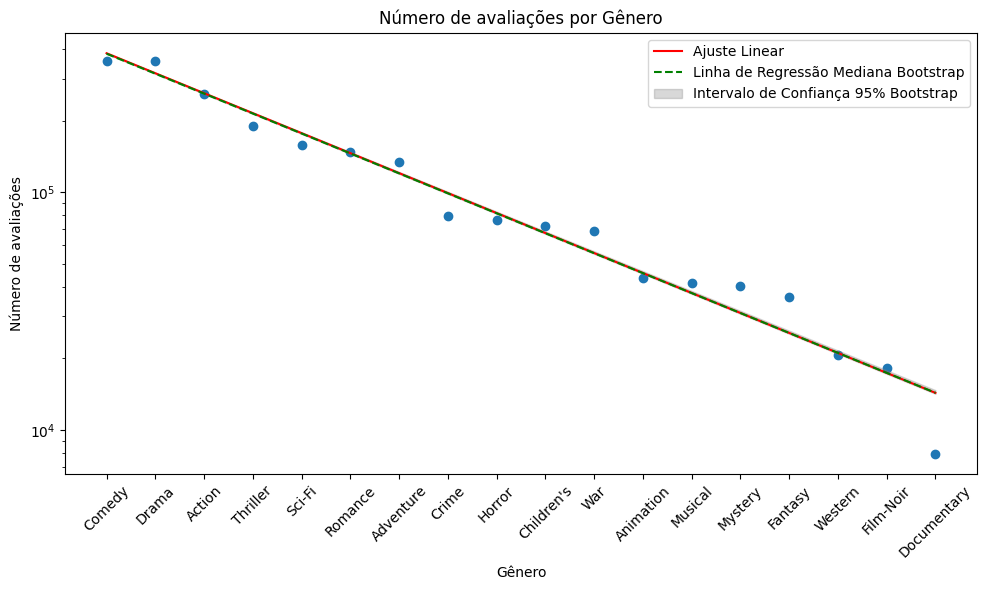

Coeficientes da Linha de Regressão Linear:
Inclinação: -0.08391964885675687
Intercepto: 5.582126706010022
Drama          98153
Comedy         96271
Romance        50297
Action         45650
Thriller       40308
Sci-Fi         27400
Adventure      27332
Children's     21317
Crime          16442
Horror         14635
War            14093
Musical        13505
Animation      12221
Mystery         9976
Fantasy         8718
Film-Noir       4202
Western         3477
Documentary     1940
Name: count, dtype: int64


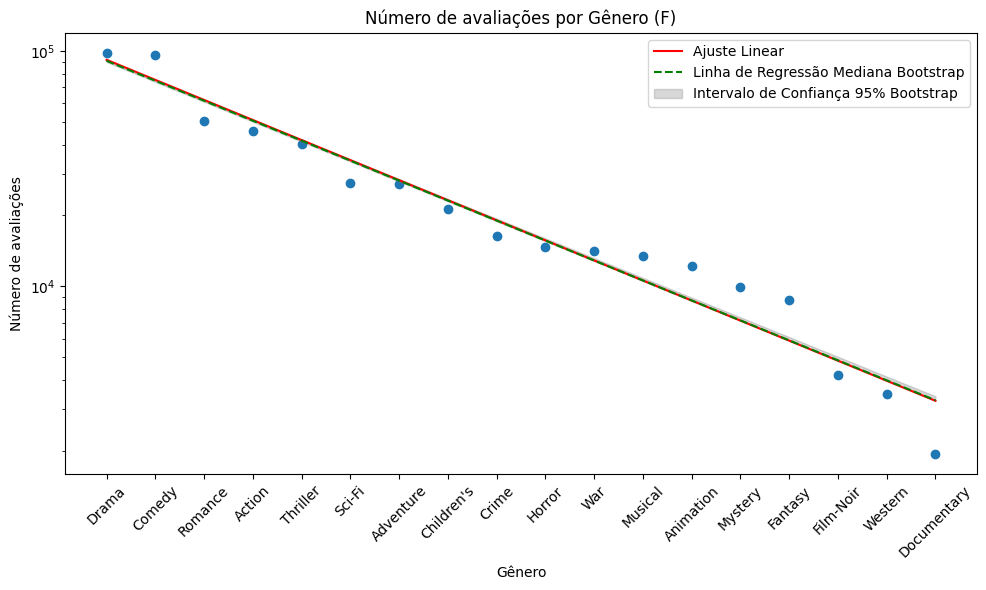

Coeficientes da Linha de Regressão Linear:
Inclinação: -0.0848244272865633
Intercepto: 4.958047264760761
Comedy         260309
Drama          256376
Action         211807
Thriller       149372
Sci-Fi         129894
Adventure      106621
Romance         97226
Crime           63099
Horror          61751
War             54434
Children's      50869
Animation       31072
Mystery         30202
Musical         28028
Fantasy         27583
Western         17206
Film-Noir       14059
Documentary      5970
Name: count, dtype: int64


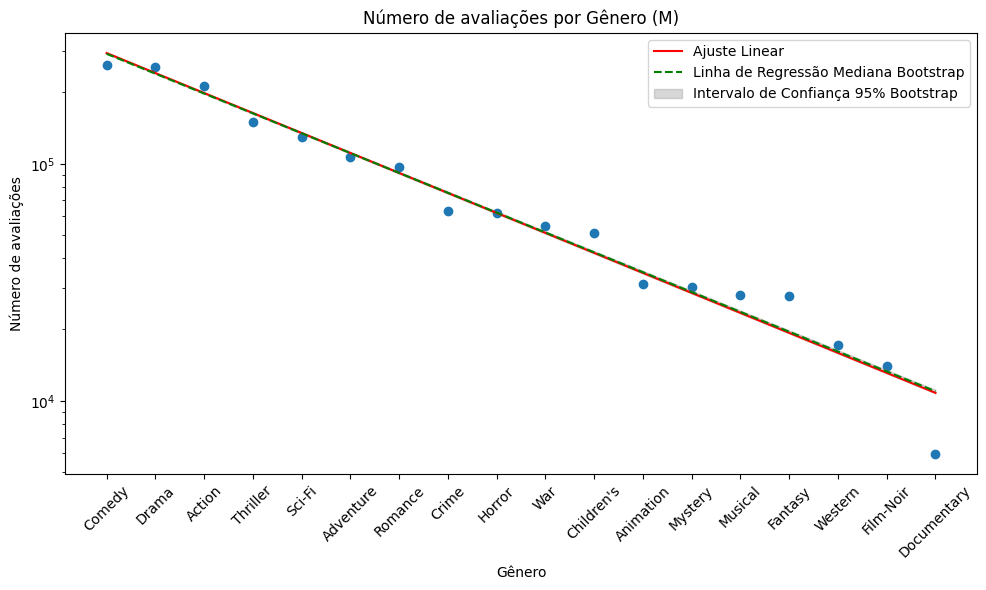

Coeficientes da Linha de Regressão Linear:
Inclinação: -0.08371420015413128
Intercepto: 5.463553683086509


In [53]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import funcoes_pack as fun

def avaliacao_genero(df, graphName):
    # Separa os gêneros, contando a frequência de cada um
    genre_counts = df['Genres'].str.split('|', expand=True).stack().value_counts()
    print(genre_counts)

    # Configura o tamanho da figura
    plt.figure(figsize=(10, 6))

    # Cria um gráfico de dispersão com os gêneros no eixo x e o número de avaliações no eixo y
    plt.scatter(range(len(genre_counts)), genre_counts.values)
    plt.xlabel('Gênero')
    plt.ylabel('Número de avaliações')
    plt.title(graphName)
    plt.xticks(range(len(genre_counts)), genre_counts.index, rotation=45)

    # Regressão linear usando olsregress
    # X é o array dos índices dos gêneros
    X = np.array(range(len(genre_counts)))

    # Y é o logaritmo base 10 dos valores de contagem de gêneros
    Y = np.log10(genre_counts.values)

    # Realiza a regressão linear usando uma função personalizada (olsregress) do pacote funcoes_pack
    beta, sd_beta = fun.olsregress(X, Y)

    # Ajuste linear
    linear_fit = beta[0] * X + beta[1]
    plt.plot(X, 10 ** linear_fit, color='red', label='Ajuste Linear')

    # Define a escala do eixo y como logarítmica
    plt.yscale('log')
    plt.legend()

    # Número de amostras de bootstrap
    num_samples = 1000

    
    bootstrap_coefs = []

    # Realiza o bootstrap e ajusta as linhas de regressão
    for _ in range(num_samples):
        # Amostra aleatoriamente os dados com reposição
        sample_indices = np.random.choice(len(genre_counts), size=len(genre_counts), replace=True)
        x_sample = X[sample_indices]
        y_sample = Y[sample_indices]
        
        # Ajusta um modelo de regressão linear à amostra de bootstrap usando olsregress
        beta_sample, _ = fun.olsregress(x_sample, y_sample)
        bootstrap_coefs.append(beta_sample)

    # Calcula os intervalos de confiança para os coeficientes usando bootstrap
    bootstrap_coefs = np.array(bootstrap_coefs)
    lower_bound_slope, upper_bound_slope = fun.bootstrap(bootstrap_coefs[:, 0])
    lower_bound_intercept, upper_bound_intercept = fun.bootstrap(bootstrap_coefs[:, 1])

    # Plota a mediana das linhas de regressão de bootstrap
    median_slope = np.median(bootstrap_coefs[:, 0])
    median_intercept = np.median(bootstrap_coefs[:, 1])
    y_pred = median_slope * X + median_intercept
    plt.plot(X, 10 ** y_pred, color='green', label='Linha de Regressão Mediana Bootstrap', linestyle='--')

    # Plota o intervalo de confiança das linhas de regressão de bootstrap
    lower_bound_y = lower_bound_slope * X + lower_bound_intercept
    upper_bound_y = upper_bound_slope * X + upper_bound_intercept
    plt.fill_between(X, 10 ** lower_bound_y, 10 ** upper_bound_y, color='gray', alpha=0.3, label='Intervalo de Confiança 95% Bootstrap')

    # Ajusta o layout e mostra a legenda
    plt.tight_layout()
    plt.legend()
    plt.show()

    # Imprime os coeficientes da linha de regressão linear
    print("Coeficientes da Linha de Regressão Linear:")
    print(f"Inclinação: {median_slope}")
    print(f"Intercepto: {median_intercept}")

avaliacao_genero(full_df, 'Número de avaliações por Gênero')
avaliacao_genero(full_df[full_df['Gender'] == 'F'], 'Número de avaliações por Gênero (F)')
avaliacao_genero(full_df[full_df['Gender'] == 'M'], 'Número de avaliações por Gênero (M)')

In [54]:
print(users_df[users_df['Gender'] == 'F'].count())
print(users_df[users_df['Gender'] == 'M'].count())

UserId        1709
Gender        1709
AgeRange      1709
Occupation    1709
Zip           1709
dtype: int64
UserId        4331
Gender        4331
AgeRange      4331
Occupation    4331
Zip           4331
dtype: int64


Comedy         356580
Drama          354529
Action         257457
Thriller       189680
Sci-Fi         157294
Romance        147523
Adventure      133953
Crime           79541
Horror          76386
Children's      72186
War             68527
Animation       43293
Musical         41533
Mystery         40178
Fantasy         36301
Western         20683
Film-Noir       18261
Documentary      7910
Name: count, dtype: int64


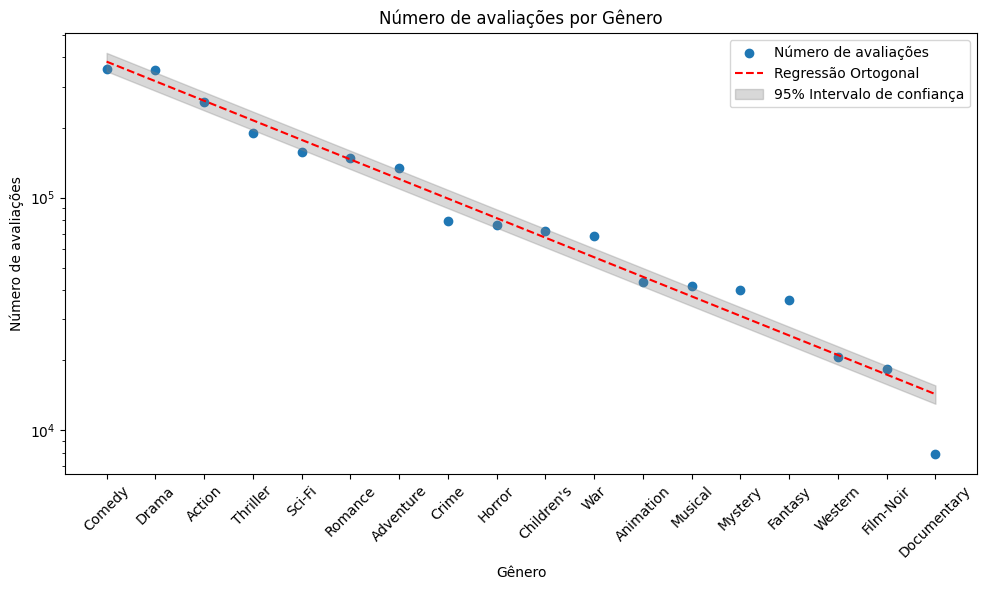

Coeficientes da Linha de Regressão Ortogonal:
Slope: -0.08406262257475765
Intercept: 5.584255138162322
Drama          98153
Comedy         96271
Romance        50297
Action         45650
Thriller       40308
Sci-Fi         27400
Adventure      27332
Children's     21317
Crime          16442
Horror         14635
War            14093
Musical        13505
Animation      12221
Mystery         9976
Fantasy         8718
Film-Noir       4202
Western         3477
Documentary     1940
Name: count, dtype: int64


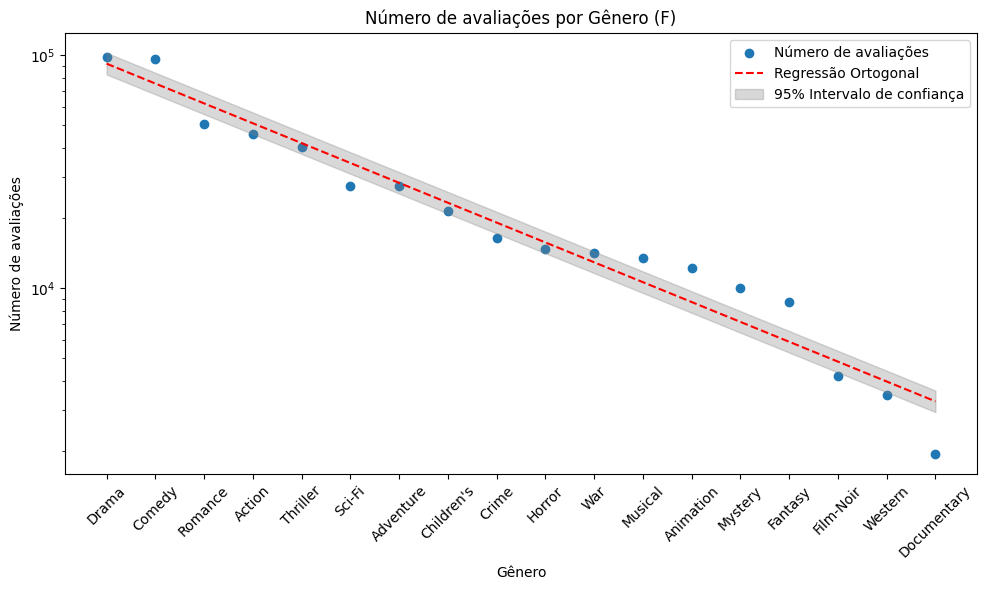

Coeficientes da Linha de Regressão Ortogonal:
Slope: -0.08523445200852826
Intercept: 4.962532238049843
Comedy         260309
Drama          256376
Action         211807
Thriller       149372
Sci-Fi         129894
Adventure      106621
Romance         97226
Crime           63099
Horror          61751
War             54434
Children's      50869
Animation       31072
Mystery         30202
Musical         28028
Fantasy         27583
Western         17206
Film-Noir       14059
Documentary      5970
Name: count, dtype: int64


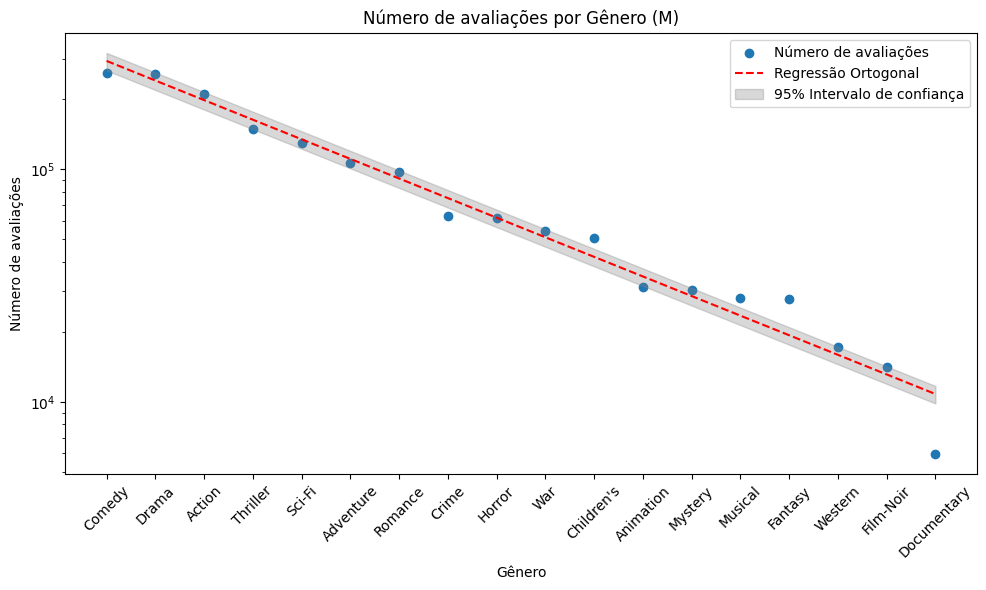

Coeficientes da Linha de Regressão Ortogonal:
Slope: -0.08430374458873137
Intercept: 5.466972248171786


In [55]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import funcoes_pack as fun
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import funcoes_pack as fun

def avaliacao_genero(df, graphName):
    # Separa os gêneros, contando a frequência de cada um
    genre_counts = df['Genres'].str.split('|', expand=True).stack().value_counts()
    print(genre_counts)

    # Configura o tamanho da figura
    plt.figure(figsize=(10, 6))

    # Cria um gráfico de dispersão com os gêneros no eixo x e o número de avaliações no eixo y
    plt.scatter(range(len(genre_counts)), genre_counts.values, label='Número de avaliações')
    plt.xlabel('Gênero')
    plt.ylabel('Número de avaliações')
    plt.title(graphName)
    plt.xticks(range(len(genre_counts)), genre_counts.index, rotation=45)

    # Regressão linear usando olsregress
    # X é o array dos índices dos gêneros
    X = np.array(range(len(genre_counts)))

    # Y é o logaritmo base 10 dos valores de contagem de gêneros
    Y = np.log10(genre_counts.values)

    # Modelo de regressão ortogonal
    a, aintr = fun.olsregress(X, Y)
    Y_pred = a[1] + a[0] * X
    confidence_interval = fun.bootstrap(Y - Y_pred, confidence=0.95, iterations=10000, sample_size=1.0)
    lower_bound, upper_bound = confidence_interval

    # Gráfico de regressão
    plt.plot(X, 10**Y_pred, color='red', linestyle='--', label='Regressão Ortogonal')
    plt.fill_between(X, 10**(Y_pred + lower_bound), 10**(Y_pred + upper_bound), color='gray', alpha=0.3, label='95% Intervalo de confiança')
    plt.yscale('log')
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Coeficientes da linha de regressão ortogonal
    slope = a[0]
    intercept = a[1]
    print("Coeficientes da Linha de Regressão Ortogonal:")
    print(f"Slope: {slope}")
    print(f"Intercept: {intercept}")

# Exemplo de uso da função
# df = pd.read_csv('path_to_your_data.csv')  # Suponha que df é seu DataFrame
# avaliacao_genero(df, 'Avaliação por Gênero')


# Exemplo de uso da função
avaliacao_genero(full_df, 'Número de avaliações por Gênero')
avaliacao_genero(full_df[full_df['Gender'] == 'F'], 'Número de avaliações por Gênero (F)')
avaliacao_genero(full_df[full_df['Gender'] == 'M'], 'Número de avaliações por Gênero (M)')


In [8]:
####### removendo coluna irrelevante
full_df = full_df.drop(columns=['Timestamp'])

In [6]:
#### Criando coluna de sentimentos
full_df['Sentiment'] = full_df['Rating'].apply(lambda x: 'positive' if x >= 4 else ('neutral' if x == 3 else 'negative'))


In [9]:
#Criar colunas binárias para cada gênero:

genres = full_df['Genres'].str.get_dummies(sep='|')
full_df = pd.concat([full_df, genres], axis=1)

In [10]:
from sklearn.model_selection import train_test_split

# Separar recursos (X) e o rótulo (y)
X = full_df.drop(columns=['Rating', 'Sentiment'], errors='ignore')  # Recursos
y = full_df['Rating']  # Rótulo de exemplo

# Dividir em Treinamento (70%), Validação (15%), e Teste (15%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Exibir tamanhos dos conjuntos
print(f"Treinamento: {X_train.shape}, Validação: {X_val.shape}, Teste: {X_test.shape}")

Treinamento: (700146, 27), Validação: (150031, 27), Teste: (150032, 27)


In [12]:
# SentimentIntensityAnalyzer(): Inicializa o analisador de sentimentos VADER.
# polarity_scores(): Retorna um dicionário com a pontuação do sentimento.
# compound: A pontuação de sentimento geral, que vai de -1 (muito negativo) a +1 (muito positivo).
# Classificação: Usamos um limiar de 0.05 para determinar se o sentimento é "positivo", "negativo" ou "neutro".

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Inicializando o analisador de sentimentos
analyzer = SentimentIntensityAnalyzer()

# Função para aplicar o VADER no título do filme
def get_sentiment_score(text):
    sentiment = analyzer.polarity_scores(text)
    return sentiment['compound']  # Retorna o escore de sentimento (valor entre -1 e 1)

# Aplicando a função ao título dos filmes
full_df['Sentiment_Score'] = full_df['Title'].apply(get_sentiment_score)

# Classificando o sentimento em 'positivo', 'negativo' ou 'neutro'
full_df['Sentiment_VADER'] = full_df['Sentiment_Score'].apply(
    lambda x: 'positive' if x >= 0.05 else ('negative' if x <= -0.05 else 'neutral')
)

# Exibir as primeiras linhas para conferir os resultados
print(full_df[['Title', 'Sentiment_Score', 'Sentiment_VADER']].head())

                                    Title  Sentiment_Score Sentiment_VADER
0  One Flew Over the Cuckoo's Nest (1975)           0.0000         neutral
1        James and the Giant Peach (1996)           0.0000         neutral
2                     My Fair Lady (1964)           0.3182        positive
3                  Erin Brockovich (2000)           0.0000         neutral
4                    Bug's Life, A (1998)           0.0000         neutral


In [13]:
# 3. Modelo de Recomendação Baseado em Conteúdo
# Agora, vamos usar o modelo de recomendação baseado em conteúdo, que recomenda filmes com base em características como gêneros, título e sentimento.

# Usaremos o TF-IDF para os títulos dos filmes e aplicaremos um modelo de similaridade de cosseno para recomendar filmes:

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Usar o TfidfVectorizer para transformar os títulos em vetores numéricos
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(full_df['Title'])

# Calcular a similaridade de cosseno entre os filmes
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Função para recomendar filmes com base no título
def recommend_movies_based_on_content(movie_idx, cosine_sim=cosine_sim):
    sim_scores = list(enumerate(cosine_sim[movie_idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]  # Pegue os 10 filmes mais semelhantes
    movie_indices = [i[0] for i in sim_scores]
    return full_df['Title'].iloc[movie_indices]

# Testar a recomendação para o primeiro filme (índice 0)
recommended_movies = recommend_movies_based_on_content(0)
print(recommended_movies)

: 

In [ ]:
# 4. Modelo de Recomendação Colaborativo
# Agora, vamos usar um modelo colaborativo de filtragem baseado em matrizes, como o Collaborative Filtering para recomendar filmes com base nas preferências de outros usuários.

# Usaremos a biblioteca surprise, que é amplamente usada para recomendações colaborativas.

from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split
from surprise import accuracy

# Preparar dados para o modelo de recomendação colaborativo
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(ratings_df[['UserId', 'MovieId', 'Rating']], reader)

# Dividir os dados em treino e teste
trainset, testset = train_test_split(data, test_size=0.2)

# Usar o algoritmo SVD para predições
model = SVD()
model.fit(trainset)

# Fazer predições no conjunto de teste
predictions = model.test(testset)

# Avaliar o modelo usando RMSE
rmse = accuracy.rmse(predictions)
print(f"RMSE: {rmse}")

# Função para recomendar filmes com base em um usuário
def recommend_movies_collaborative(user_id, top_n=10):
    movie_ids = ratings_df['MovieId'].unique()
    predictions = []
    
    for movie_id in movie_ids:
        prediction = model.predict(user_id, movie_id)
        predictions.append((movie_id, prediction.est))
    
    # Ordenar por predição de maior para menor
    recommendations = sorted(predictions, key=lambda x: x[1], reverse=True)[:top_n]
    
    recommended_movie_ids = [x[0] for x in recommendations]
    return movies_df[movies_df['MovieId'].isin(recommended_movie_ids)]

# Testar para o usuário 1
recommended_movies_collab = recommend_movies_collaborative(1)
print(recommended_movies_collab[['Title']])

In [ ]:
# 5. Sistema de Recomendação Híbrido
# Finalmente, você pode combinar o modelo de 
# recomendação baseado em conteúdo com o modelo colaborativo, atribuindo pesos para cada um e retornando uma lista combinada de recomendações.

def hybrid_recommendation(user_id, movie_idx, top_n=10):
    # Recomendação colaborativa
    collaborative_recommendations = recommend_movies_collaborative(user_id, top_n=top_n)
    
    # Recomendação baseada em conteúdo
    content_recommendations = recommend_movies_based_on_content(movie_idx)
    
    # Combinando recomendações (exemplo simples de junção)
    all_recommendations = pd.concat([collaborative_recommendations[['Title']], content_recommendations])
    
    # Exibir as melhores recomendações
    return all_recommendations.drop_duplicates().head(top_n)

# Testar o sistema híbrido
hybrid_recommendations = hybrid_recommendation(1, 0)
print(hybrid_recommendations)